# Higher-order network motif analysis in hypergraphs

## Overview

- Compute higher-order motifs and interpret their patterns.
- Visualize motif statistics for quick inspection.


## Setup


In [1]:
import matplotlib as mpl

mpl.rcParams.update({
    "figure.figsize": (6, 4),
    "figure.dpi": 120,
    "savefig.dpi": 150,
})


The function *compute_motifs* accepts the hypergraph H as a parameter, the order of the motif analysis (i.e., the size of the patterns in terms of the number of nodes), and the runs of the configuration model for computing the score of the motifs (relative abundance). Zero runs of the configuration model corresponds to counting patterns in the input hypergraphs. For example, here we set five runs for the configuration model. Five runs is a very low number, but it is enough for the purpose of this tutorial.

The output object stores the count of the patterns on the input hypergraph, the count of the patterns on the samples from the configuration model and the relative abundance score of the motifs.

In [2]:
import sys
sys.path.append("..")

import hypergraphx as hgx
from hypergraphx.motifs import compute_motifs
from hypergraphx.readwrite import load_hypergraph
from hypergraphx.viz import plot_motifs

Here we load the dataset "high school" from our data repository

In [3]:
H = load_hypergraph("../test_data/hs/hs.json")

In [4]:
motifs = compute_motifs(H, order=3, runs_config_model=1)

In [5]:
print(motifs.keys())

dict_keys(['observed', 'config_model', 'norm_delta'])


In [6]:
motifs['observed']

[(((1, 2), (1, 2, 3)), 58),
 (((1, 2), (1, 2, 3), (1, 3)), 231),
 (((1, 2), (1, 2, 3), (1, 3), (2, 3)), 1802),
 (((1, 2), (1, 3)), 115709),
 (((1, 2), (1, 3), (2, 3)), 28029),
 (((1, 2, 3),), 0)]

In [7]:
print(motifs['norm_delta'])

[(((1, 2), (1, 2, 3)), -0.45835203307905836), (((1, 2), (1, 2, 3), (1, 3)), 0.24064500571157607), (((1, 2), (1, 2, 3), (1, 3), (2, 3)), 0.5516119901454734), (((1, 2), (1, 3)), -0.08273686984970684), (((1, 2), (1, 3), (2, 3)), 0.3391267882843986), (((1, 2, 3),), -0.5530598874999895)]


In [8]:
motif_profile = [i[1] for i in motifs['norm_delta']]


Let's plot the profile. Please keep in mind that the x-axis of the plot follows the original paper convention, displaying first the patterns involving lower-order interactions only.

<Axes: ylabel='Motif abundance score'>

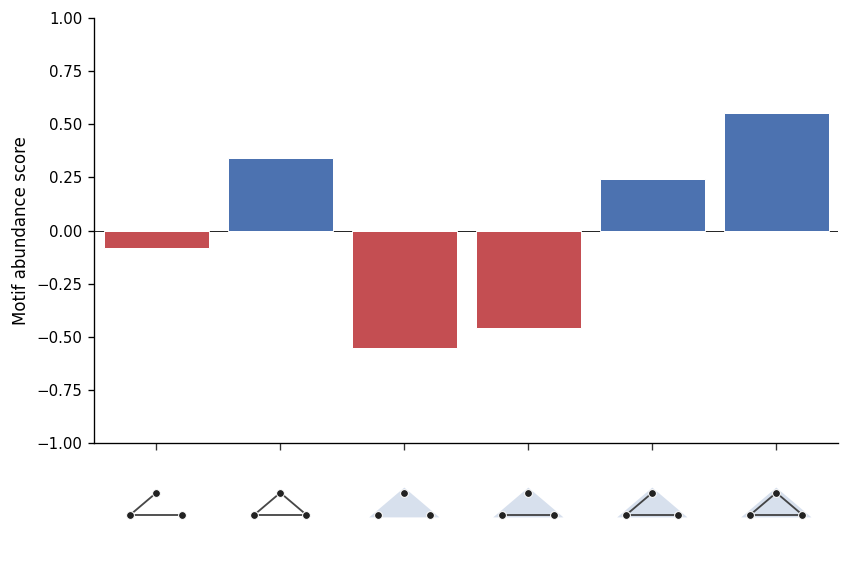

In [9]:
plot_motifs(motif_profile)